Numerical value of r_ta= 6.9787e+13 m ,t_ta= 3.4368e+09 seconds
Analytical value of r_ta= 8.5581e+13 m


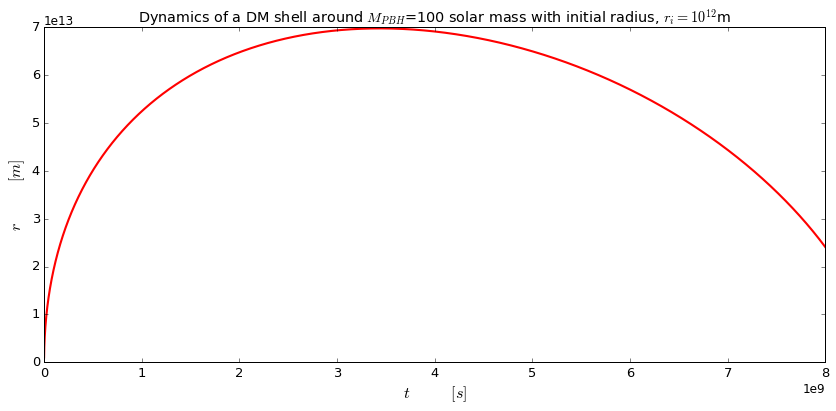

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint


G= 6.67e-11                # in units of m^3⋅kg^−1⋅s^−2
M_PBH= 1.989e32            # in units of kg
t_i=2.358e5                # in units of seconds
t_eq=1.59246e12            # in units of seconds
r_i=1e12                   # in units of meters

def j(n,p):
    return [n[1], (((-G*M_PBH)/((n[0]**2))) - (n[0]/(4*p**2)))]

z0= [r_i,(r_i/(2*t_i))]   #with initial radius, r_i=1e12m

ps= np.linspace(2.358e5,8e9,2000000) 
ns= odeint(j,z0,ps)
zs= ns[:,0]
zs_list = zs.tolist()
for i in  range(1,len(zs_list)):
    Δ=(zs[i] - zs[i-1])
    r_ta=zs[i]           #Numerical value of r_ta
    t_ta=ps[i]
    if Δ<0:
        print("Numerical value of r_ta=",'%.4e'% r_ta,"m", "," "t_ta=",'%.4e'% t_ta,"seconds")
        break

        
def r(t):   #Analytical value of r_ta
    return ((4*G*M_PBH*(t**(2)))**(1/3))        
        
print("Analytical value of r_ta=",'%.4e'%r(t_ta),"m")



plt.figure(figsize=(14, 6))
plt.style.use('classic')
plt.rc('lines', linewidth=2.1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.plot(ps,zs,'r')
plt.xlabel('$t\hspace{3}  [s]$',fontsize=16)
plt.ylabel('$r \hspace{3}  [m]$',fontsize=16)
plt.title('Dynamics of a DM shell around $M_{PBH}$=100 solar mass with initial radius, $r_{i}=10^{12}$m')
plt.show()